In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import confusion_matrix
from tensorflow.keras import backend as K
from datetime import datetime
start_time = datetime.now()

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [3]:
df = pd.read_excel('F://UCSI_research//PG_Matters//Chan Kok Pin//post-viva//Dataset//Classification_data//Rice_AhTeck//fullset_rice_AhTeck2_cut_snv.xlsx')   
NC=2  #number of class
X = np.expand_dims(df.values[1:, 1:].astype(float), axis=2)#reshaping
Y = df.values[1:, 0]
#number of wavelenght/feature
F1=X.shape[1] 
tf.random.set_seed(0)
print(X.shape)

(122, 217, 1)


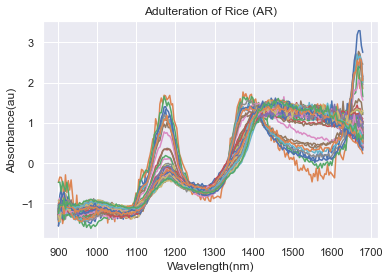

In [4]:
#add print spectrum...
sns.set_theme()
X1 = df.values[:, 1:].astype('float32')  
y_toc = df.values[:,0]    
wl = np.linspace(900,1680, num=X1.shape[1], endpoint=True)   #wavelength range
plt.plot(wl,X1.T)
plt.title('Adulteration of Rice (AR)', fontsize = 12)
plt.xlabel(r'Wavelength(nm)', fontsize=12)
plt.ylabel('Absorbance(au)', fontsize=12)
plt.savefig('adult rice.png', dpi=300)
plt.show()

In [5]:
#train set,test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)  

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(91, 217, 1)
(91,)
(31, 217, 1)
(31,)


In [27]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(F1,1)
    ),
    keras.layers.Conv1D(
        filters=hp.Int('conv_2_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv1D(
        filters=hp.Int('conv_3_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv1D(
        filters=hp.Int('conv_4_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_4_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv1D(
        filters=hp.Int('conv_5_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_5_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv1D(
        filters=hp.Int('conv_6_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_6_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv1D(
        filters=hp.Int('conv_7_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_7_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv1D(
        filters=hp.Int('conv_8_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_8_kernel', values = [3,5]),
        activation='relu'
    ),
      keras.layers.Conv1D(
        filters=hp.Int('conv_9_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_9_kernel', values = [3,5]),
        activation='relu'
    ),
      keras.layers.Conv1D(
        filters=hp.Int('conv_10_filter', min_value=16, max_value=128, step=16),
        kernel_size=hp.Choice('conv_10_kernel', values = [3,5]),
        activation='relu',  name='last_lay'
    ),
#     keras.layers.MaxPooling1D(pool_size=hp.Int('pool_2_size',min_value=2, max_value=6, step=1)), 
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=16, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(NC, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-1, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_metric])
  
  return model

In [28]:
from keras_tuner import RandomSearch, Hyperband
from keras_tuner.engine.hyperparameters import HyperParameters

In [29]:
# tuner_search=RandomSearch(build_model,
#                           objective='val_accuracy',overwrite=True,
#                           max_trials=10,directory='output1',project_name="AR classify")
tuner_search=Hyperband(build_model,
                          objective='val_accuracy',overwrite=True,
                          max_epochs=20,directory='output1',project_name="AR classify")

In [30]:
tuner_search.search_space_summary()

Search space summary
Default search space size: 22
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': None}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': None}
conv_2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_3_filter (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': None}
conv_3_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_4_filter (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': None}
conv_4_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_5_filter (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16

In [31]:
tuner_search.search(X_train, Y_train, epochs=50, validation_split=0.1)

Trial 30 Complete [00h 00m 12s]
val_accuracy: 0.800000011920929

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 38s
INFO:tensorflow:Oracle triggered exit


In [32]:
tuner_search.results_summary()

Results summary
Results in output1\AR classify
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1_filter: 16
conv_1_kernel: 5
conv_2_filter: 80
conv_2_kernel: 5
conv_3_filter: 96
conv_3_kernel: 3
conv_4_filter: 96
conv_4_kernel: 5
conv_5_filter: 80
conv_5_kernel: 3
conv_6_filter: 16
conv_6_kernel: 3
conv_7_filter: 96
conv_7_kernel: 5
conv_8_filter: 64
conv_8_kernel: 5
conv_9_filter: 64
conv_9_kernel: 3
conv_10_filter: 32
conv_10_kernel: 5
dense_1_units: 96
learning_rate: 0.001
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 3
conv_2_filter: 80
conv_2_kernel: 5
conv_3_filter: 80
conv_3_kernel: 3
conv_4_filter: 64
conv_4_kernel: 3
conv_5_filter: 48
conv_5_kernel: 5
conv_6_filter: 32
conv_6_kernel: 5
conv_7_filter: 48
conv_7_kernel: 3
conv_8_filter: 80
conv_8_kernel: 5
conv_9_filter: 96
conv_9_kernel: 5
conv_10_filter: 32
conv_10_kernel: 3
dense_1_units: 48
learning_rate: 0.1
tuner

In [33]:
par=tuner_search.get_best_hyperparameters(1)[0]
print(par.values)

{'conv_1_filter': 16, 'conv_1_kernel': 5, 'conv_2_filter': 80, 'conv_2_kernel': 5, 'conv_3_filter': 96, 'conv_3_kernel': 3, 'conv_4_filter': 96, 'conv_4_kernel': 5, 'conv_5_filter': 80, 'conv_5_kernel': 3, 'conv_6_filter': 16, 'conv_6_kernel': 3, 'conv_7_filter': 96, 'conv_7_kernel': 5, 'conv_8_filter': 64, 'conv_8_kernel': 5, 'conv_9_filter': 64, 'conv_9_kernel': 3, 'conv_10_filter': 32, 'conv_10_kernel': 5, 'dense_1_units': 96, 'learning_rate': 0.001, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [34]:
model=tuner_search.get_best_models(num_models=1)[0]

In [35]:
history=model.fit(X_train, Y_train, epochs=500, validation_split=0.1 , initial_epoch=1)


Epoch 2/500
3/3 [==============================] - 2s 315ms/step - loss: 0.2691 - accuracy: 0.9259 - f1_metric: 0.8830 - val_loss: 0.6739 - val_accuracy: 0.8000 - val_f1_metric: 0.8889
Epoch 3/500
3/3 [==============================] - 0s 145ms/step - loss: 0.3231 - accuracy: 0.9012 - f1_metric: 0.8763 - val_loss: 0.2111 - val_accuracy: 0.9000 - val_f1_metric: 0.8889
Epoch 4/500
3/3 [==============================] - 0s 130ms/step - loss: 0.2287 - accuracy: 0.9012 - f1_metric: 0.8594 - val_loss: 0.2060 - val_accuracy: 0.9000 - val_f1_metric: 0.8889
Epoch 5/500
3/3 [==============================] - 0s 137ms/step - loss: 0.2158 - accuracy: 0.9259 - f1_metric: 0.8576 - val_loss: 0.1945 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 6/500
3/3 [==============================] - 0s 125ms/step - loss: 0.2088 - accuracy: 0.9383 - f1_metric: 0.8671 - val_loss: 0.2018 - val_accuracy: 0.8000 - val_f1_metric: 0.8889
Epoch 7/500
3/3 [==============================] - 0s 125ms/step - loss: 0.

3/3 [==============================] - 0s 135ms/step - loss: 0.1246 - accuracy: 0.9506 - f1_metric: 0.8800 - val_loss: 0.0304 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 91/500
3/3 [==============================] - 0s 123ms/step - loss: 0.0772 - accuracy: 0.9877 - f1_metric: 0.8728 - val_loss: 0.0195 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 92/500
3/3 [==============================] - 0s 120ms/step - loss: 0.0617 - accuracy: 0.9753 - f1_metric: 0.8508 - val_loss: 0.0290 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 93/500
3/3 [==============================] - 0s 125ms/step - loss: 0.0612 - accuracy: 0.9877 - f1_metric: 0.8737 - val_loss: 0.0928 - val_accuracy: 0.9000 - val_f1_metric: 0.8889
Epoch 94/500
3/3 [==============================] - 0s 123ms/step - loss: 0.0717 - accuracy: 0.9630 - f1_metric: 0.8594 - val_loss: 0.0621 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 95/500
3/3 [==============================] - 0s 123ms/step - loss: 0.0660 - 

Epoch 134/500
3/3 [==============================] - 0s 125ms/step - loss: 0.0195 - accuracy: 0.9877 - f1_metric: 0.8862 - val_loss: 0.0089 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 135/500
3/3 [==============================] - 0s 128ms/step - loss: 0.0189 - accuracy: 0.9877 - f1_metric: 0.8877 - val_loss: 0.1798 - val_accuracy: 0.9000 - val_f1_metric: 0.8889
Epoch 136/500
3/3 [==============================] - 0s 122ms/step - loss: 0.0157 - accuracy: 1.0000 - f1_metric: 0.8716 - val_loss: 0.1615 - val_accuracy: 0.9000 - val_f1_metric: 0.8889
Epoch 137/500
3/3 [==============================] - 0s 122ms/step - loss: 0.0107 - accuracy: 1.0000 - f1_metric: 0.8792 - val_loss: 0.0103 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 138/500
3/3 [==============================] - 0s 130ms/step - loss: 0.0119 - accuracy: 1.0000 - f1_metric: 0.8839 - val_loss: 0.0569 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 139/500
3/3 [==============================] - 0s 127ms/ste

Epoch 220/500
3/3 [==============================] - 0s 125ms/step - loss: 3.4405e-05 - accuracy: 1.0000 - f1_metric: 0.8728 - val_loss: 0.0326 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 221/500
3/3 [==============================] - 0s 128ms/step - loss: 3.2093e-05 - accuracy: 1.0000 - f1_metric: 0.8737 - val_loss: 0.0296 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 222/500
3/3 [==============================] - 0s 122ms/step - loss: 3.1582e-05 - accuracy: 1.0000 - f1_metric: 0.8737 - val_loss: 0.0278 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 223/500
3/3 [==============================] - 0s 123ms/step - loss: 3.1646e-05 - accuracy: 1.0000 - f1_metric: 0.8800 - val_loss: 0.0279 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 224/500
3/3 [==============================] - 0s 125ms/step - loss: 3.2148e-05 - accuracy: 1.0000 - f1_metric: 0.8737 - val_loss: 0.0269 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 225/500
3/3 [==========================

Epoch 263/500
3/3 [==============================] - 0s 125ms/step - loss: 1.7838e-05 - accuracy: 1.0000 - f1_metric: 0.8787 - val_loss: 0.0234 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 264/500
3/3 [==============================] - 0s 128ms/step - loss: 1.8609e-05 - accuracy: 1.0000 - f1_metric: 0.8847 - val_loss: 0.0234 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 265/500
3/3 [==============================] - 0s 135ms/step - loss: 1.7617e-05 - accuracy: 1.0000 - f1_metric: 0.8837 - val_loss: 0.0211 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 266/500
3/3 [==============================] - 0s 125ms/step - loss: 1.7090e-05 - accuracy: 1.0000 - f1_metric: 0.8837 - val_loss: 0.0199 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 267/500
3/3 [==============================] - 0s 148ms/step - loss: 1.7139e-05 - accuracy: 1.0000 - f1_metric: 0.8837 - val_loss: 0.0191 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 268/500
3/3 [==========================

Epoch 306/500
3/3 [==============================] - 0s 130ms/step - loss: 1.1907e-05 - accuracy: 1.0000 - f1_metric: 0.8667 - val_loss: 0.0169 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 307/500
3/3 [==============================] - 0s 128ms/step - loss: 1.2102e-05 - accuracy: 1.0000 - f1_metric: 0.8877 - val_loss: 0.0179 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 308/500
3/3 [==============================] - 0s 123ms/step - loss: 1.2198e-05 - accuracy: 1.0000 - f1_metric: 0.8735 - val_loss: 0.0175 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 309/500
3/3 [==============================] - 0s 131ms/step - loss: 1.1293e-05 - accuracy: 1.0000 - f1_metric: 0.8792 - val_loss: 0.0154 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 310/500
3/3 [==============================] - 0s 148ms/step - loss: 1.1417e-05 - accuracy: 1.0000 - f1_metric: 0.8787 - val_loss: 0.0142 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 311/500
3/3 [==========================

Epoch 349/500
3/3 [==============================] - 0s 152ms/step - loss: 8.4280e-06 - accuracy: 1.0000 - f1_metric: 0.8735 - val_loss: 0.0146 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 350/500
3/3 [==============================] - 0s 165ms/step - loss: 8.2690e-06 - accuracy: 1.0000 - f1_metric: 0.8735 - val_loss: 0.0158 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 351/500
3/3 [==============================] - 1s 167ms/step - loss: 8.4677e-06 - accuracy: 1.0000 - f1_metric: 0.8735 - val_loss: 0.0163 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 352/500
3/3 [==============================] - 0s 160ms/step - loss: 8.6280e-06 - accuracy: 1.0000 - f1_metric: 0.8737 - val_loss: 0.0167 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 353/500
3/3 [==============================] - 0s 148ms/step - loss: 8.6339e-06 - accuracy: 1.0000 - f1_metric: 0.8792 - val_loss: 0.0161 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 354/500
3/3 [==========================

Epoch 392/500
3/3 [==============================] - 0s 145ms/step - loss: 6.2824e-06 - accuracy: 1.0000 - f1_metric: 0.8735 - val_loss: 0.0138 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 393/500
3/3 [==============================] - 0s 138ms/step - loss: 6.1500e-06 - accuracy: 1.0000 - f1_metric: 0.8839 - val_loss: 0.0131 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 394/500
3/3 [==============================] - 0s 146ms/step - loss: 6.1736e-06 - accuracy: 1.0000 - f1_metric: 0.8792 - val_loss: 0.0129 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 395/500
3/3 [==============================] - 0s 132ms/step - loss: 6.2839e-06 - accuracy: 1.0000 - f1_metric: 0.8792 - val_loss: 0.0128 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 396/500
3/3 [==============================] - 0s 134ms/step - loss: 6.2560e-06 - accuracy: 1.0000 - f1_metric: 0.8872 - val_loss: 0.0129 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 397/500
3/3 [==========================

Epoch 435/500
3/3 [==============================] - 0s 123ms/step - loss: 5.0301e-06 - accuracy: 1.0000 - f1_metric: 0.8496 - val_loss: 0.0133 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 436/500
3/3 [==============================] - 0s 140ms/step - loss: 4.9727e-06 - accuracy: 1.0000 - f1_metric: 0.8735 - val_loss: 0.0135 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 437/500
3/3 [==============================] - 0s 127ms/step - loss: 4.9183e-06 - accuracy: 1.0000 - f1_metric: 0.8837 - val_loss: 0.0127 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 438/500
3/3 [==============================] - 0s 127ms/step - loss: 4.7800e-06 - accuracy: 1.0000 - f1_metric: 0.8407 - val_loss: 0.0124 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 439/500
3/3 [==============================] - 0s 125ms/step - loss: 4.7770e-06 - accuracy: 1.0000 - f1_metric: 0.8667 - val_loss: 0.0125 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 440/500
3/3 [==========================

Epoch 478/500
3/3 [==============================] - 0s 125ms/step - loss: 3.8985e-06 - accuracy: 1.0000 - f1_metric: 0.8594 - val_loss: 0.0130 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 479/500
3/3 [==============================] - 0s 125ms/step - loss: 3.9161e-06 - accuracy: 1.0000 - f1_metric: 0.8737 - val_loss: 0.0130 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 480/500
3/3 [==============================] - 0s 128ms/step - loss: 3.9559e-06 - accuracy: 1.0000 - f1_metric: 0.8787 - val_loss: 0.0132 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 481/500
3/3 [==============================] - 0s 124ms/step - loss: 3.8514e-06 - accuracy: 1.0000 - f1_metric: 0.8728 - val_loss: 0.0131 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 482/500
3/3 [==============================] - 0s 123ms/step - loss: 3.8528e-06 - accuracy: 1.0000 - f1_metric: 0.8716 - val_loss: 0.0129 - val_accuracy: 1.0000 - val_f1_metric: 0.8889
Epoch 483/500
3/3 [==========================

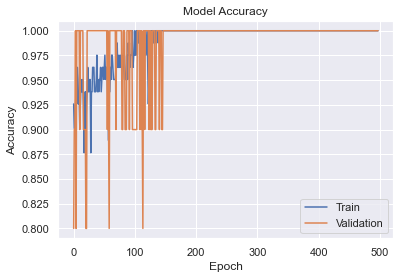

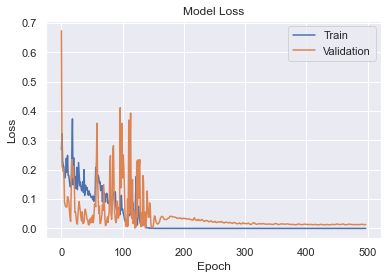

In [36]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'][0:-1:1])     #step=10  [start:end:step]
plt.plot(history.history['val_accuracy'][0:-1:1])   #step=10
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best') 
plt.show()
# summarize history for loss 
plt.plot(history.history['loss'][0:-1:1])        #step=10
plt.plot(history.history['val_loss'][0:-1:1])      #step=10
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best') 
plt.show()

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 213, 16)           96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 209, 80)           6480      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 207, 96)           23136     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 203, 96)           46176     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 201, 80)           23120     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 199, 16)           3856      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 195, 96)           7

In [38]:
from sklearn.metrics import f1_score, accuracy_score
scores1 = model.evaluate(X_train,Y_train,verbose=0)
scores2 = model.evaluate(X_test,Y_test,verbose=0)
Y_pred1 = np.argmax(model.predict(X_train), axis=-1)
Y_pred2 = np.argmax(model.predict(X_test), axis=-1)
print('Train Acc:',  "%.2f" % (accuracy_score(Y_train, Y_pred1)*100)  , '%')
print('Train F1:' ,"%.2f" % f1_score(Y_train, Y_pred1))
print('Test Acc:', "%.2f" % (accuracy_score(Y_test, Y_pred2) * 100), '%')
print('Test F1:' ,"%.2f" % f1_score(Y_test, Y_pred2))

Train Acc: 100.00 %
Train F1: 1.00
Test Acc: 93.55 %
Test F1: 0.95


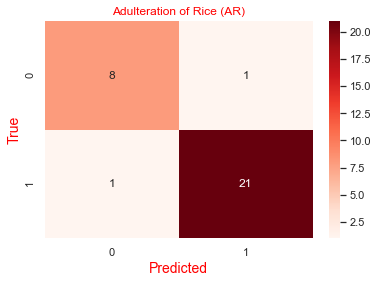

In [39]:
cm1=confusion_matrix(y_true=Y_test, y_pred=Y_pred2 )
sns.heatmap(cm1, annot=True, cmap='Reds', fmt='g')
plt.title('Adulteration of Rice (AR)', color= 'red', fontsize=12)
plt.xlabel('Predicted', color= 'red', fontsize=14)
plt.ylabel('True', color= 'red', fontsize=14)
plt.savefig('AR matrices confuse.png', dpi=300, bbox_inches='tight', transparent=False)

In [40]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 1:24:34.883301


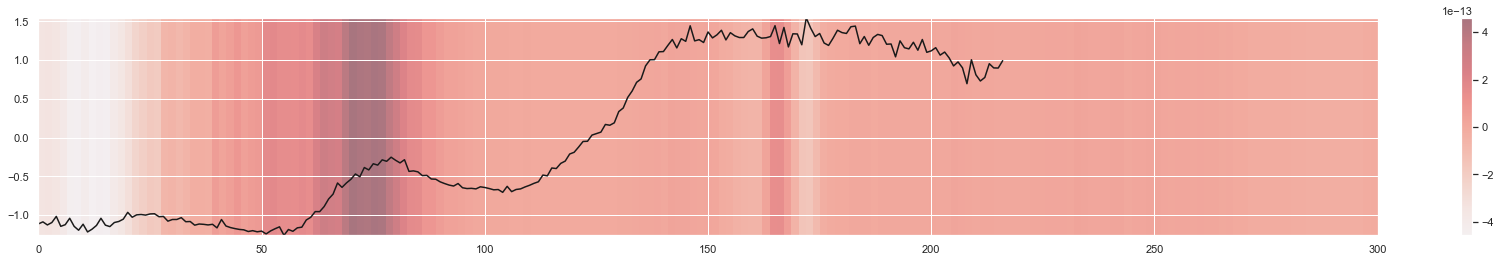

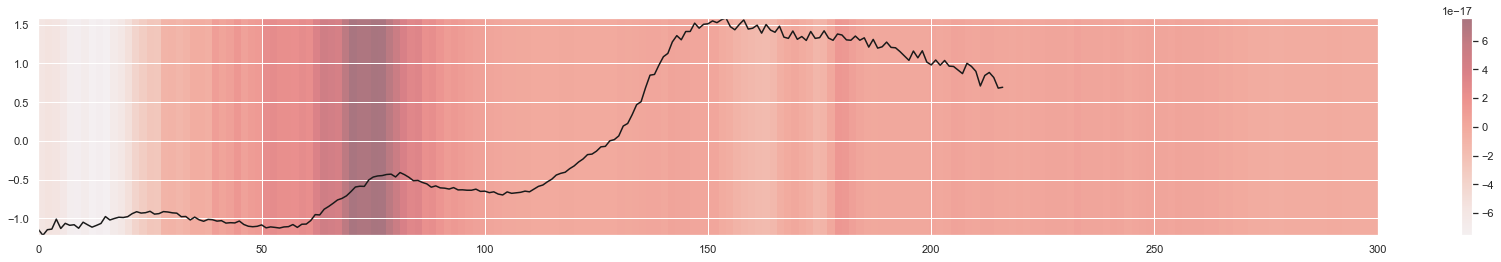

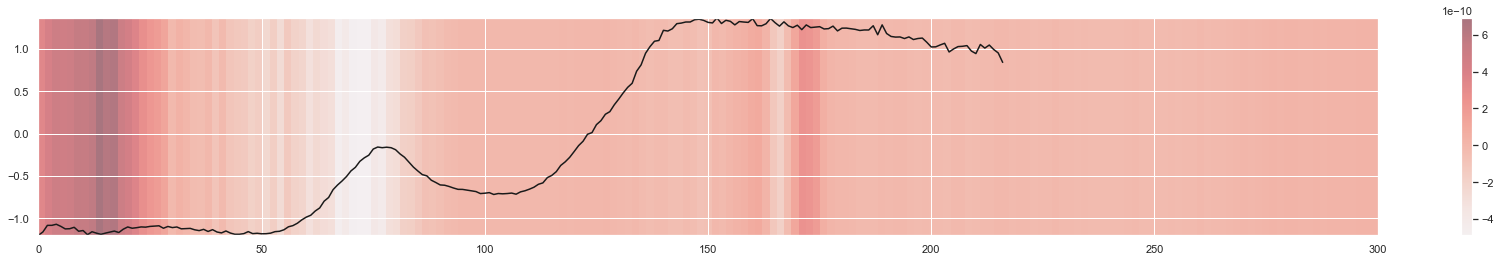

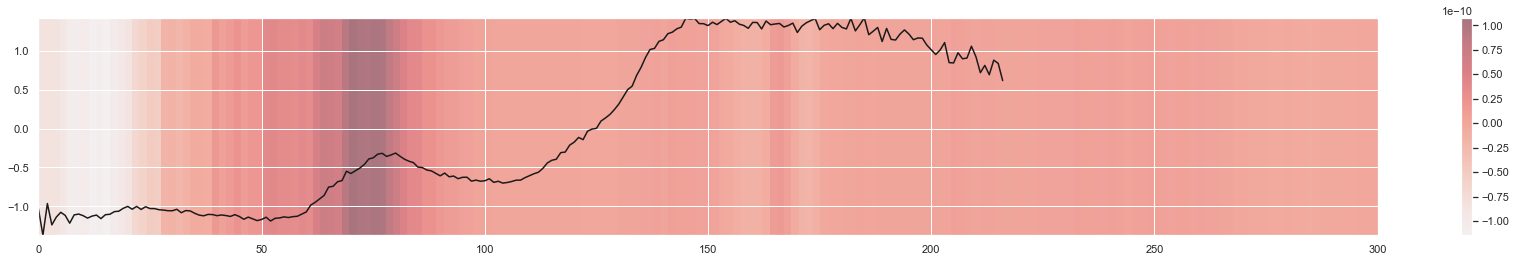

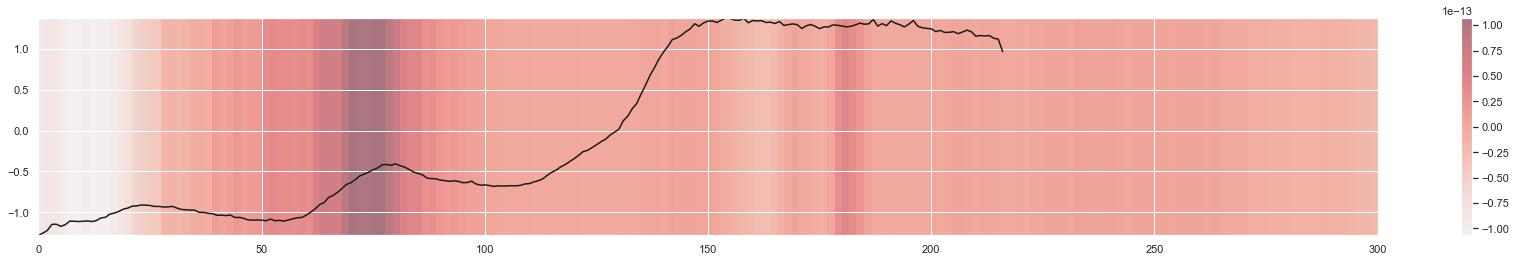

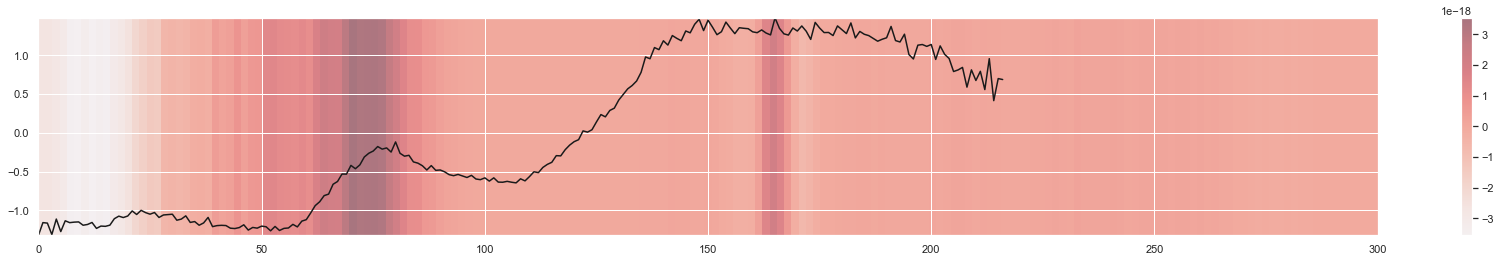

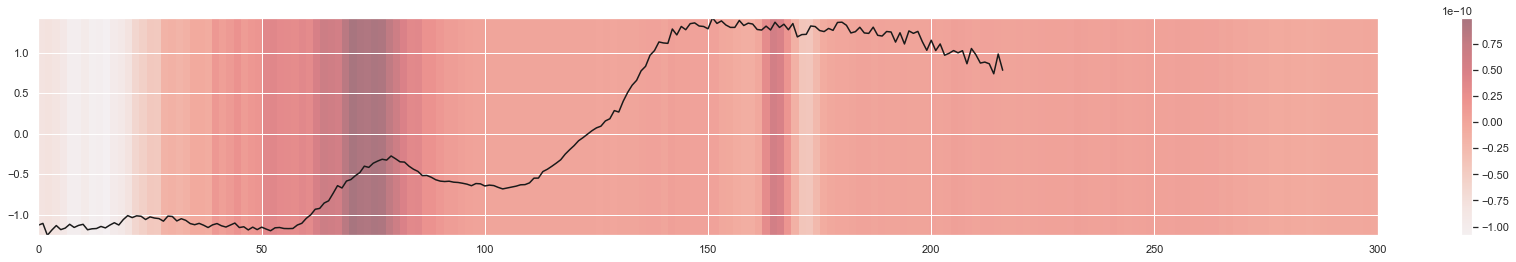

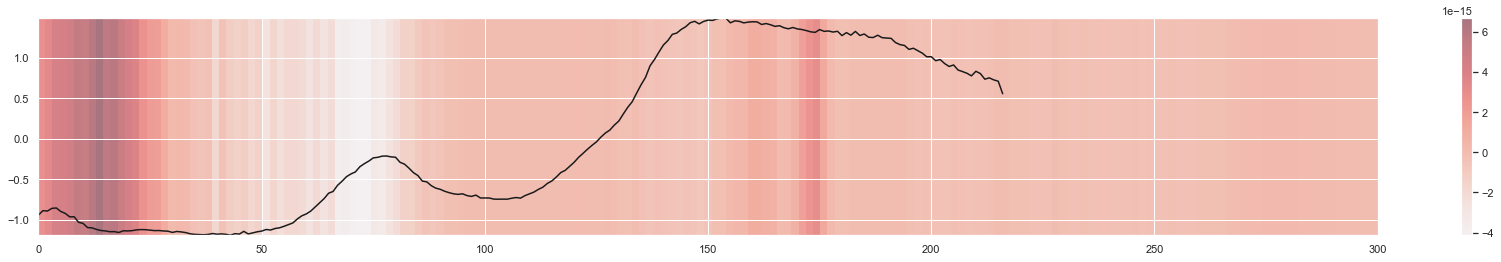

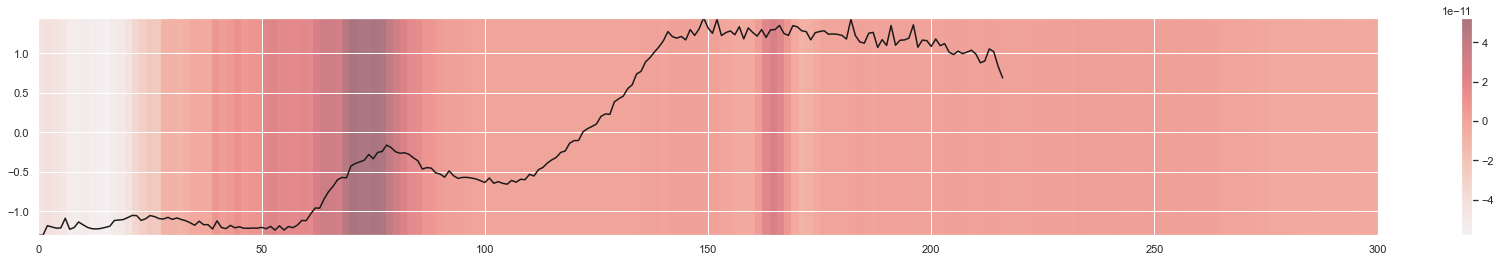

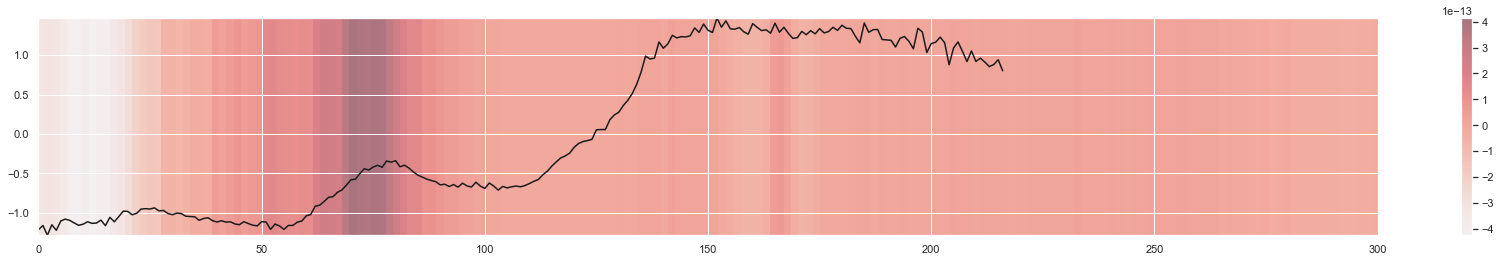

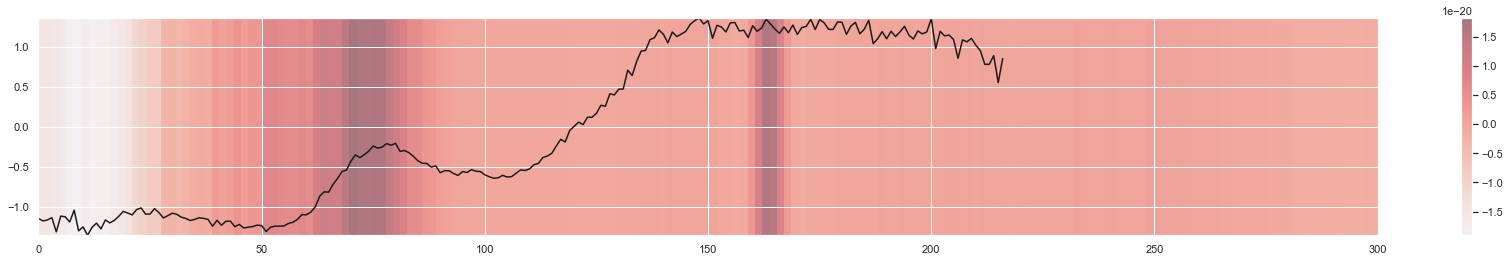

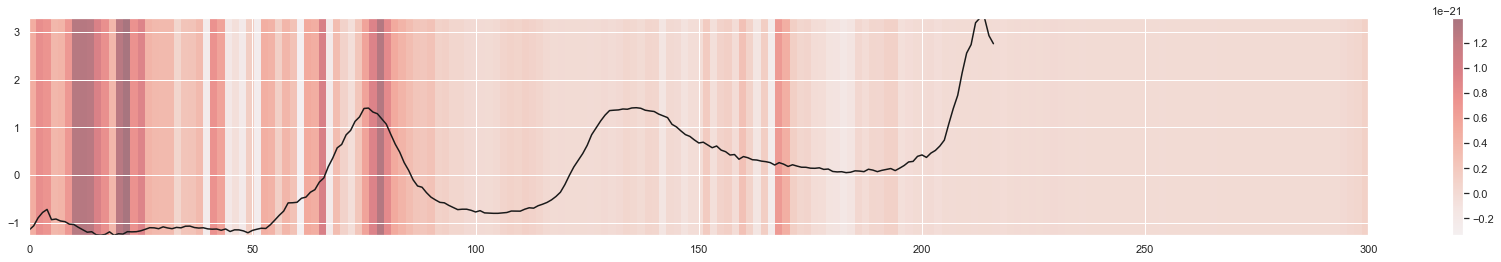

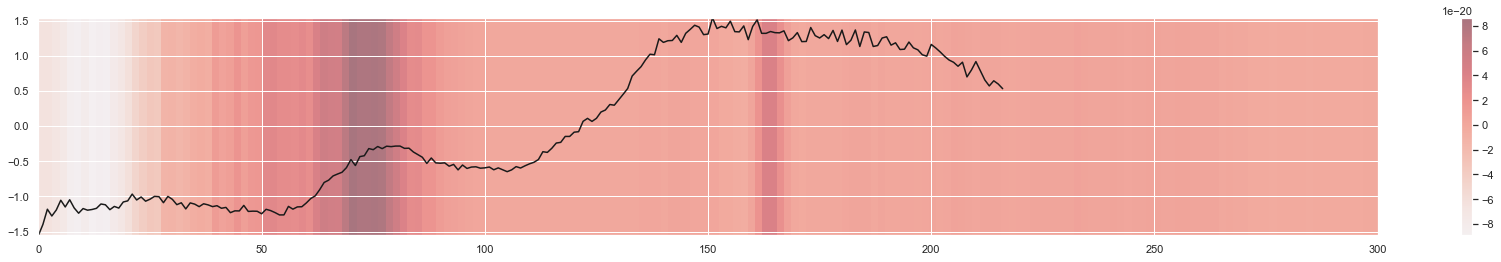

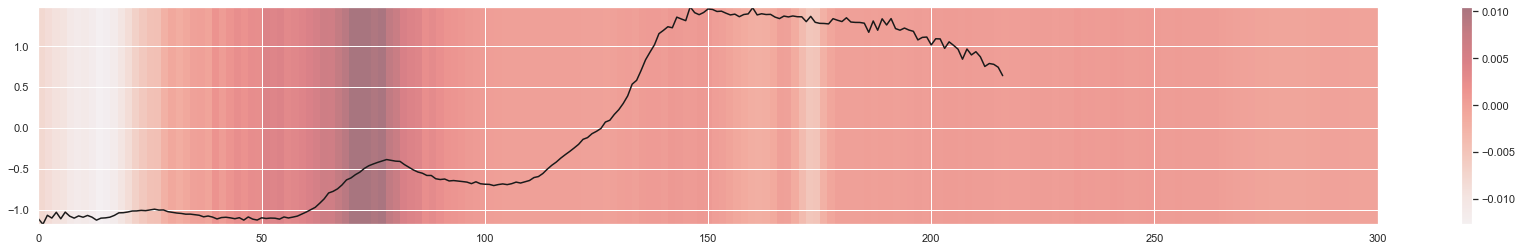

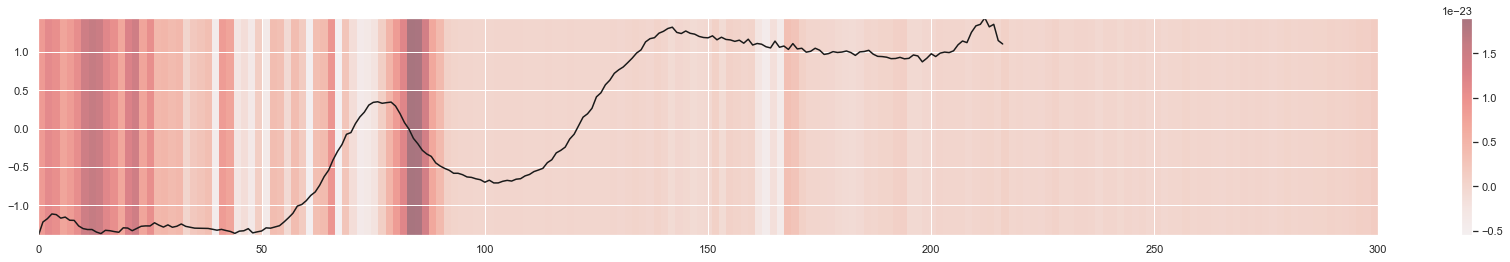

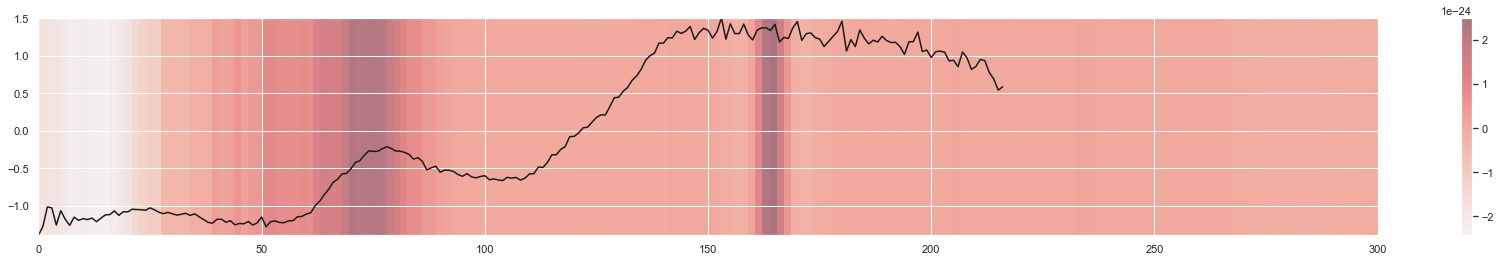

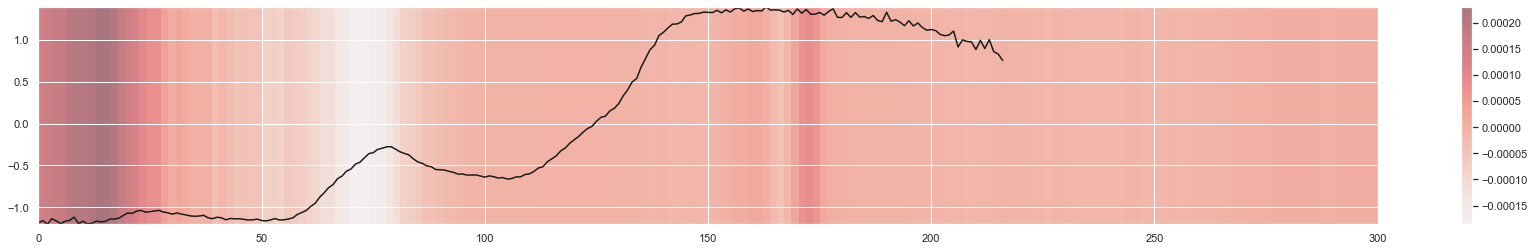

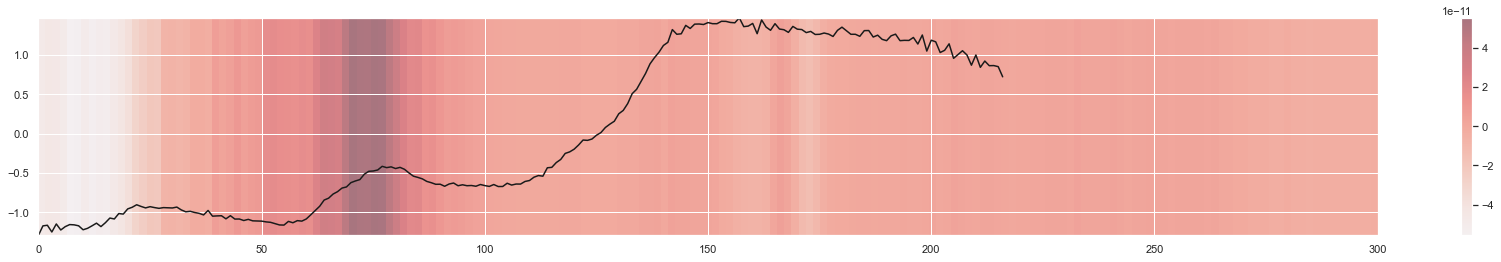

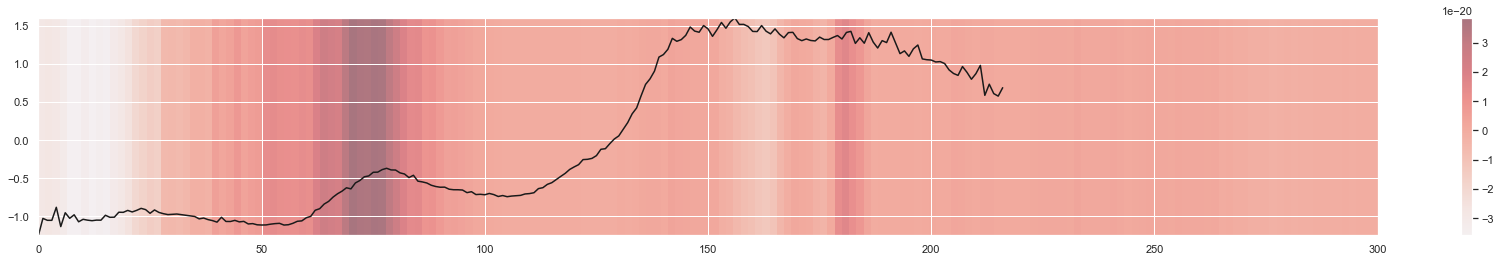

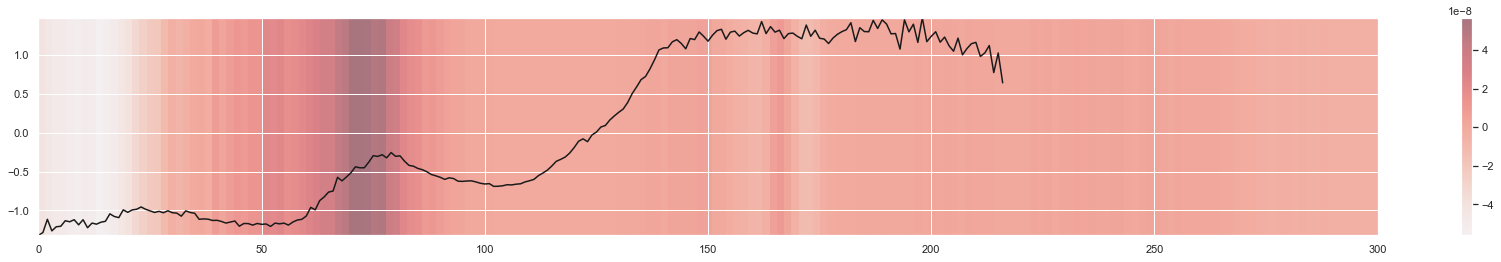

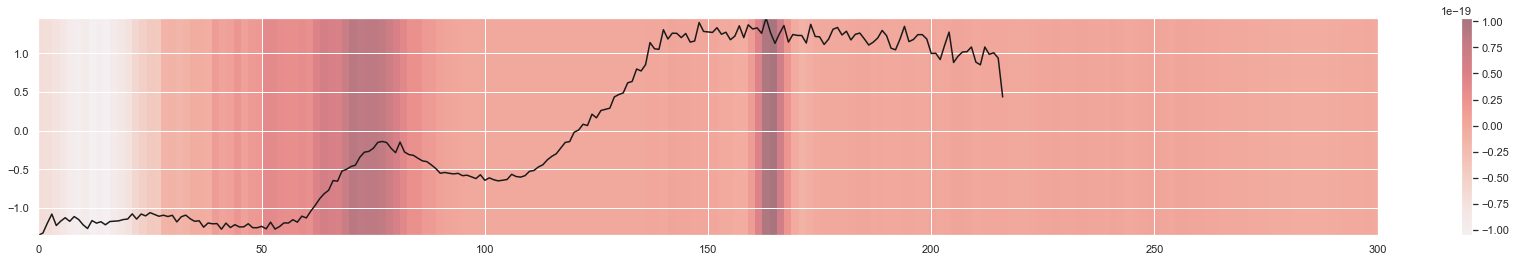

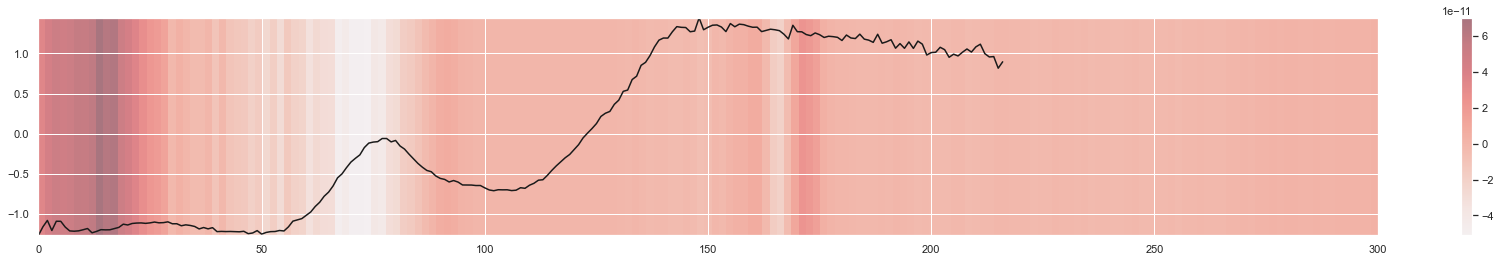

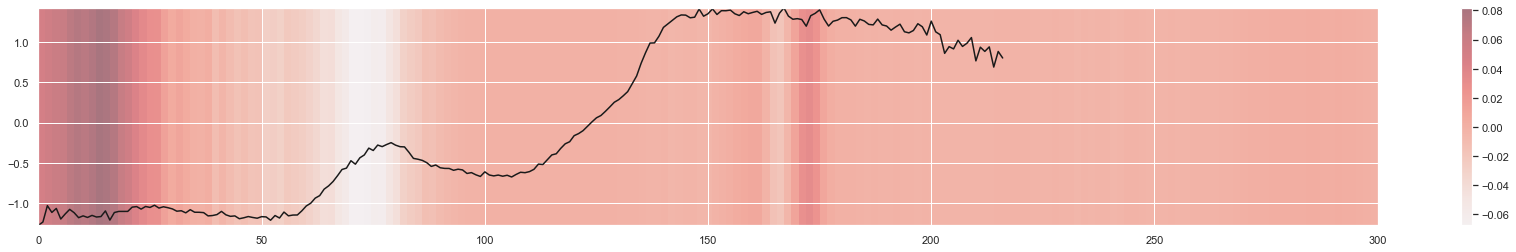

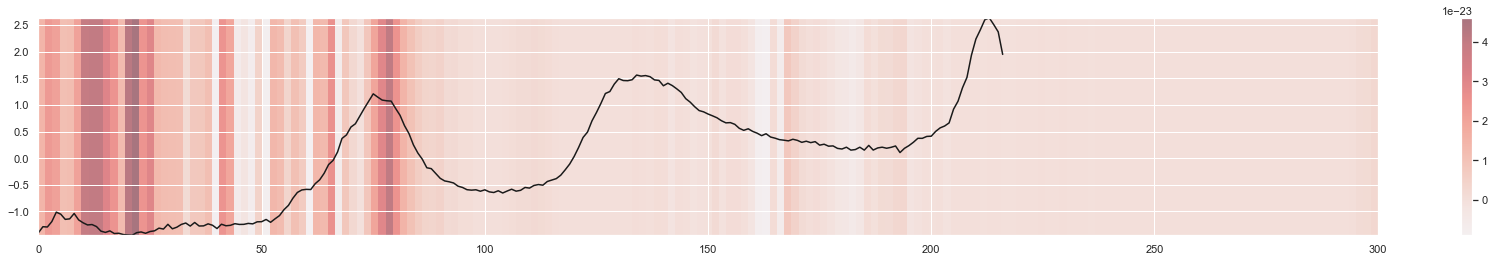

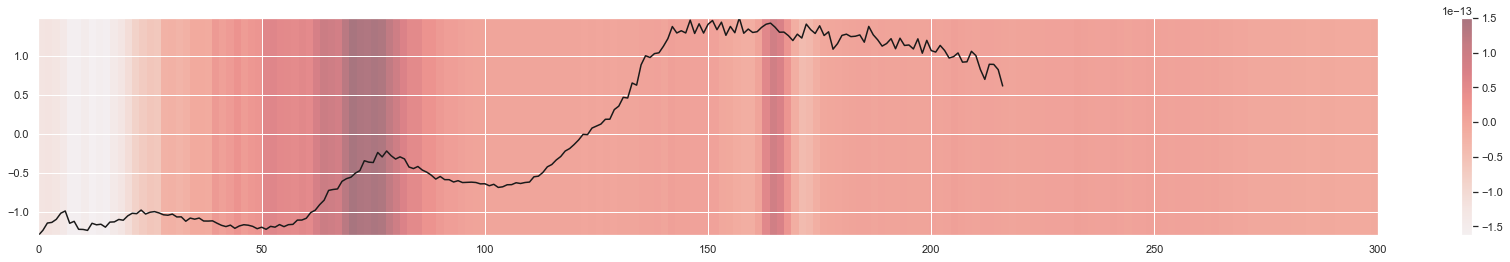

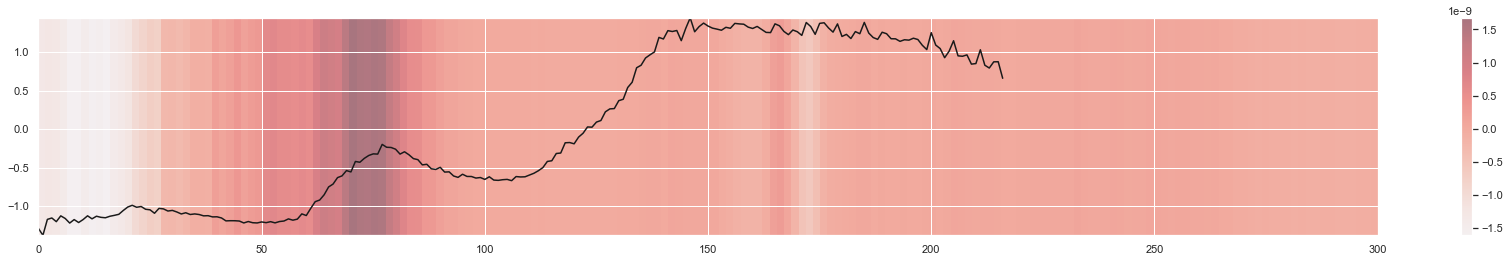

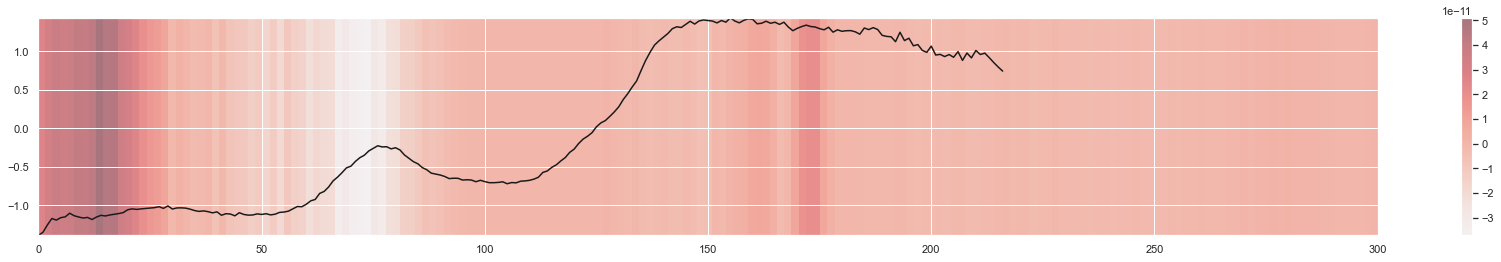

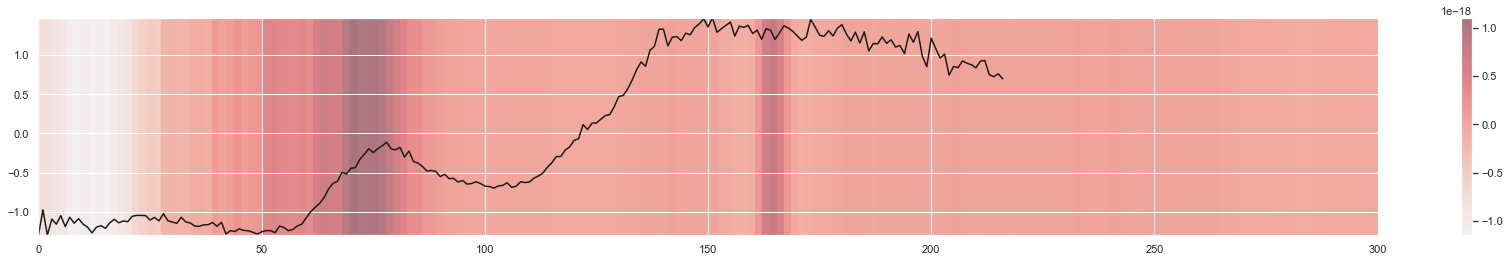

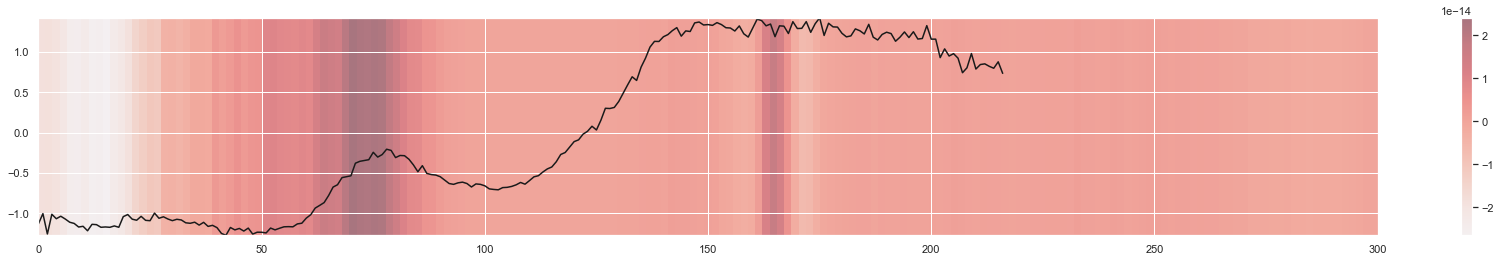

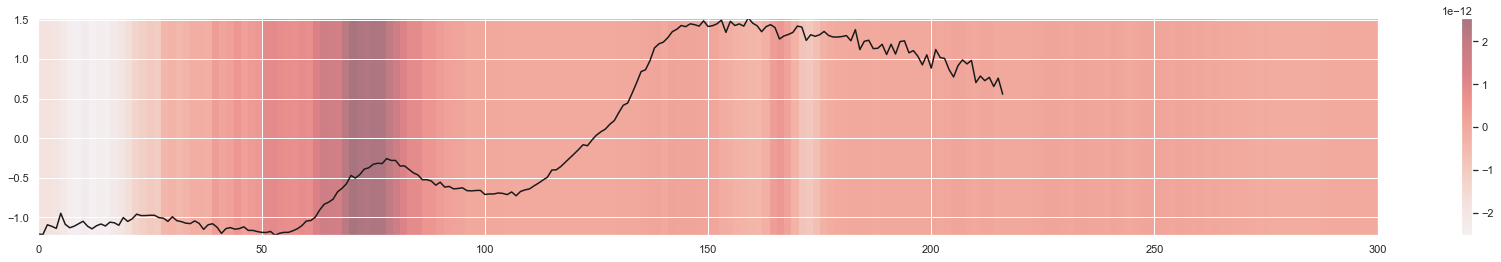

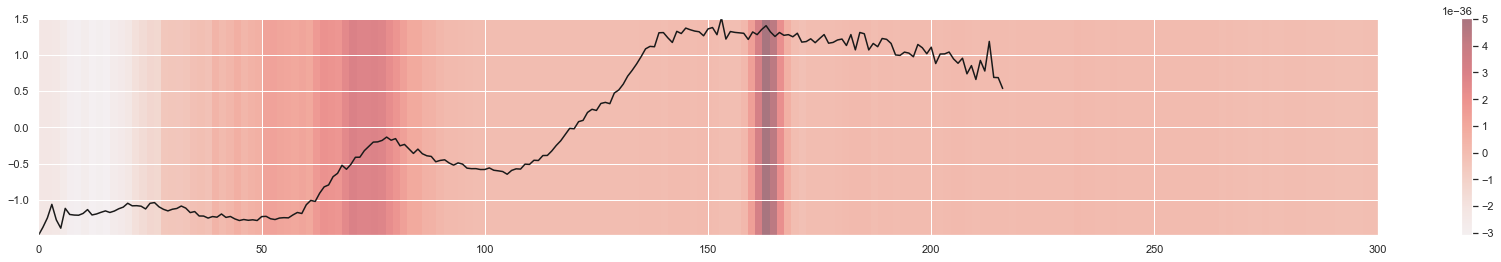

In [41]:
#GRAD-CAM implementation


def grad_cam(layer_name, data):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    last_conv_layer_output, preds = grad_model(data)

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(data)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0))

    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output * pooled_grads
    heatmap = tf.reduce_mean(heatmap, axis=(1))
    heatmap = np.expand_dims(heatmap,0)
    return heatmap

layer_name = "last_lay"
for i in X_test:
    data = np.expand_dims(i,0)
    heatmap = grad_cam(layer_name,data)

    plt.figure(figsize=(30,4))
    plt.imshow(np.expand_dims(heatmap,axis=2),cmap='Reds', aspect="auto", interpolation='nearest',extent=[0,300,i.min(),i.max()], alpha=0.5)
    plt.plot(i,'k')
    plt.colorbar()
    plt.show()